In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf


In [77]:
#leemos los datos
data = pd.read_csv("../dataset/data_evaluacion.csv")
data.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [78]:
#Asiganmos nombres a las columnas sin etiquetas
data.columns = [
    'edad',                # age
    'clase_laboral',       # workclass
    'fnlwgt',              # continuous (final weight)
    'educacion',           # education
    'anios_educacion_dedicados',       # continuous (education-num)
    'estado_civil',        # marital-status
    'ocupacion',           # occupation
    'relacion',            # relationship
    'raza',                # race
    'sexo',                # sex
    'ganancia_capital',    # continuous (capital-gain)
    'perdida_capital',     # continuous (capital-loss)
    'horas_por_semana',    # continuous (hours-per-week)
    'pais_origen',         # native-country
    'ingreso'              # income
]
data.head(5)


,edad,clase_laboral,fnlwgt,educacion,anios_educacion_dedicados,estado_civil,ocupacion,relacion,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_origen,ingreso
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [79]:
#verificamos la cantidad de filas y columnas

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   edad                       48841 non-null  int64 
 1   clase_laboral              48841 non-null  object
 2   fnlwgt                     48841 non-null  int64 
 3   educacion                  48841 non-null  object
 4   anios_educacion_dedicados  48841 non-null  int64 
 5   estado_civil               48841 non-null  object
 6   ocupacion                  48841 non-null  object
 7   relacion                   48841 non-null  object
 8   raza                       48841 non-null  object
 9   sexo                       48841 non-null  object
 10  ganancia_capital           48841 non-null  int64 
 11  perdida_capital            48841 non-null  int64 
 12  horas_por_semana           48841 non-null  int64 
 13  pais_origen                48841 non-null  object
 14  ingres

In [80]:
#verificamos datos nulos
data.isnull().sum()

edad                         0
clase_laboral                0
fnlwgt                       0
educacion                    0
anios_educacion_dedicados    0
estado_civil                 0
ocupacion                    0
relacion                     0
raza                         0
sexo                         0
ganancia_capital             0
perdida_capital              0
horas_por_semana             0
pais_origen                  0
ingreso                      0
dtype: int64

In [81]:
#Mínimos y máximos de categorías numéricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,48841.0,38.643578,13.710650,17.0,28.0,37.0,48.0,90.0
fnlwgt,48841.0,189666.430786,105603.887256,12285.0,117555.0,178147.0,237646.0,1490400.0
anios_educacion_dedicados,48841.0,10.078029,2.570965,1.0,9.0,10.0,12.0,16.0
ganancia_capital,48841.0,1079.045208,7452.093700,0.0,0.0,0.0,0.0,99999.0
perdida_capital,48841.0,87.504105,403.008483,0.0,0.0,0.0,0.0,4356.0
horas_por_semana,48841.0,40.422391,12.391571,1.0,40.0,40.0,45.0,99.0


1. La edad minima es de 17 y máxima de 90
2. el mínimo de años dedicados a estuidar es de 1 año y el máximo de 16
3. Las horas máximas dedicadasa  estudiar es de 1 hora por semana mínimo y 99 horas por semana máximo.

In [82]:
#reemplazamos los registos ? con valores nulos
data[data == '?'] = np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   edad                       48841 non-null  int64 
 1   clase_laboral              46042 non-null  object
 2   fnlwgt                     48841 non-null  int64 
 3   educacion                  48841 non-null  object
 4   anios_educacion_dedicados  48841 non-null  int64 
 5   estado_civil               48841 non-null  object
 6   ocupacion                  46032 non-null  object
 7   relacion                   48841 non-null  object
 8   raza                       48841 non-null  object
 9   sexo                       48841 non-null  object
 10  ganancia_capital           48841 non-null  int64 
 11  perdida_capital            48841 non-null  int64 
 12  horas_por_semana           48841 non-null  int64 
 13  pais_origen                47984 non-null  object
 14  ingres

In [83]:
# Rellenar valores nulos
for col in ['clase_laboral', 'ocupacion', 'pais_origen']:
    mode_value = data[col].mode()[0]  
    data[col] = data[col].fillna(mode_value) 

# Verificar valores nulos
print("Datos nulos después de rellenar:")
print(data.isnull().sum())

Datos nulos después de rellenar:
edad                         0
clase_laboral                0
fnlwgt                       0
educacion                    0
anios_educacion_dedicados    0
estado_civil                 0
ocupacion                    0
relacion                     0
raza                         0
sexo                         0
ganancia_capital             0
perdida_capital              0
horas_por_semana             0
pais_origen                  0
ingreso                      0
dtype: int64


In [84]:
data.head(5)

,edad,clase_laboral,fnlwgt,educacion,anios_educacion_dedicados,estado_civil,ocupacion,relacion,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_origen,ingreso
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [85]:
categorical = ['clase_laboral','educacion','estado_civil','ocupacion','relacion','raza','sexo','pais_origen']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(data[col])
    data[col] = label_encoder.transform(data[col])
    

data.head(5)

,edad,clase_laboral,fnlwgt,educacion,anios_educacion_dedicados,estado_civil,ocupacion,relacion,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_origen,ingreso
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,<=50K


In [86]:
data['ingreso'] = data['ingreso'].apply(lambda x: 1 if x == '>50K' else 0)

In [87]:
#Caracteristicas y variable objetivo 
x = data.drop(columns=['ingreso'], axis=1)
y = data['ingreso']


In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [89]:
scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [90]:
# Evaluar el modelo en el conjunto de entrenamiento
train_loss, train_accuracy = model_nn.evaluate(x_train_scaled, y_train, verbose=0)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model_nn.evaluate(x_test_scaled, y_test, verbose=0)

In [91]:
# Construir el modelo de red neuronal
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])


c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
# Compilar el modelo
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model_nn.fit(x_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8065 - loss: 0.4015 - val_accuracy: 0.8441 - val_loss: 0.3281
Epoch 2/10
855/855 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8447 - loss: 0.3275 - val_accuracy: 0.8479 - val_loss: 0.3244
Epoch 3/10
855/855 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8442 - loss: 0.3245 - val_accuracy: 0.8516 - val_loss: 0.3183
Epoch 4/10
855/855 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8515 - loss: 0.3159 - val_accuracy: 0.8520 - val_loss: 0.3120
Epoch 5/10
855/855 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8542 - loss: 0.3109 - val_accuracy: 0.8508 - val_loss: 0.3154
Epoch 6/10
855/855 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8491 - loss: 0.3177 - val_accuracy: 0.8519 - val_loss: 0.3131
Epoch 7/10
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8536 - loss: 0.3152 - val_accuracy: 0.8524 - val_loss: 0.3125
Epoch 8/10
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8514 - loss: 0.3121 - val_accuracy: 0.

In [93]:
# Hacer predicciones
y_pred_nn = model_nn.predict(x_test_scaled)
y_pred_nn = np.argmax(y_pred_nn, axis=1)  # Convertir probabilidades en clases


# Evalaucion del modelo
y_pred=model_nn.predict(x_test)
print('Train Accuracy: %.5f' % train_accuracy)
print('Test Accuracy: %.5f' % test_accuracy)
print("Precisión del modelo:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test,y_pred_nn))

# si la diferencia entre train y test del modelo es mas de 10 es porque tiene underfiting (le faltan datos)
# si la diferencia entre test y precisión del modelo es mas de 10 es porque tiene overfiting (el modelo esta memorizando)

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Train Accuracy: 0.85802
Test Accuracy: 0.84754
Precisión del modelo: 0.8503378147819559
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11129
           1       0.72      0.62      0.67      3524

    accuracy                           0.85     14653
   macro avg       0.80      0.77      0.79     14653
weighted avg       0.85      0.85      0.85     14653



<Figure size 1200x600 with 0 Axes>

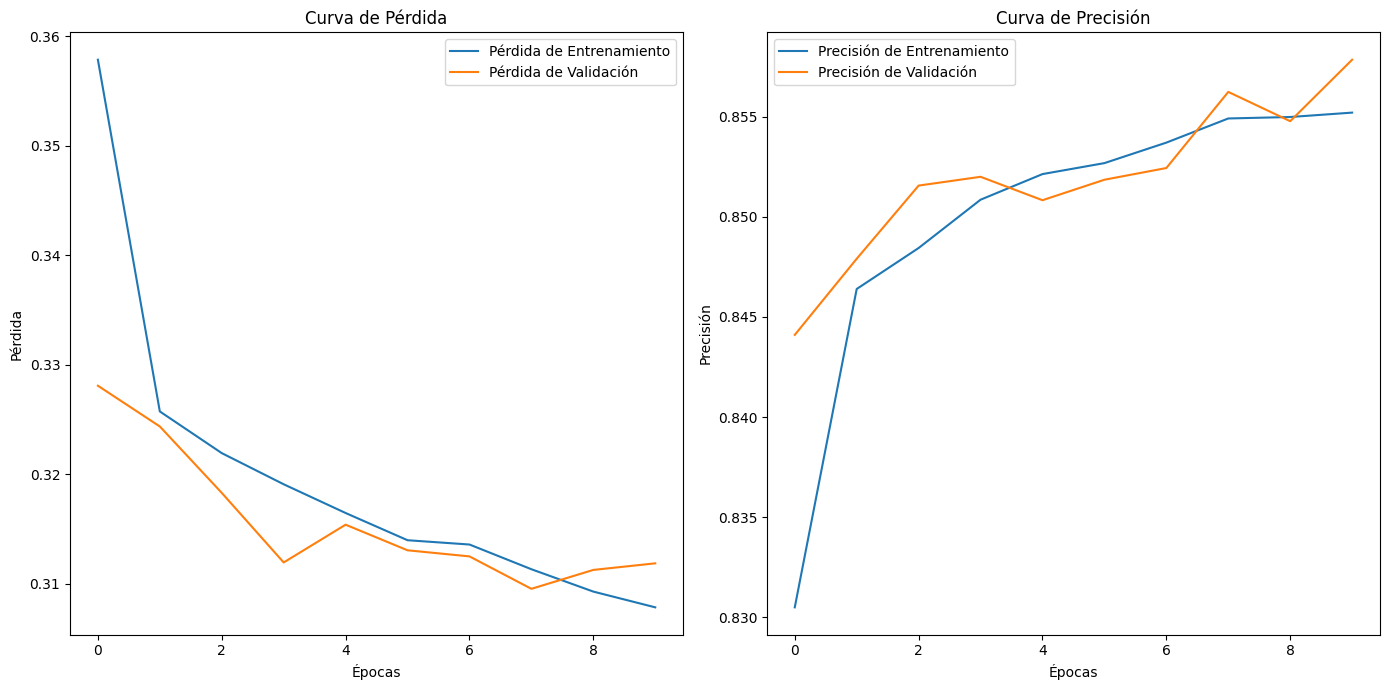

In [94]:
# Curvas de Aprendizaje
plt.figure(figsize=(12, 6))

# Pérdida de entrenamiento y validación
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curva de Pérdida')

# Precisión de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de Precisión')

plt.tight_layout()
plt.show()


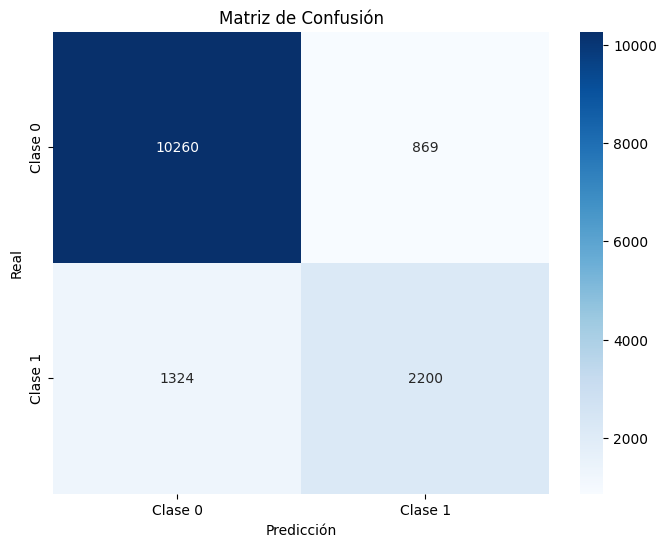

In [95]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1'],
            yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()